<a href="https://colab.research.google.com/github/JakeOh/202011_itw_bd21/blob/main/lab_ml/ml15_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit  # sigmoid

# Perceptron

In [2]:
x = np.array([1, 2])
w = np.array([0.1, 0.2])

In [3]:
x * w

array([0.1, 0.4])

In [4]:
np.sum(x * w)

0.5

In [5]:
np.dot(x, w)

0.5

In [6]:
x.dot(w)

0.5

In [7]:
x @ w

0.5

## AND Gate

| $x_1$ | $x_2$ | $y$ |
|---|---|---|
| 0 | 0 | 0 |
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |

In [8]:
def and_gate(x1, x2):
    w1, w2, th = 0.5, 0.5, 0.7
    result = x1 * w1 + x2 * w2
    if result > th:
        y = 1
    else:
        y = 0

    return y

In [9]:
and_gate(x1=0, x2=0)

0

In [10]:
and_gate(x1=0, x2=1)

0

In [11]:
and_gate(x1=1, x2=0)

0

In [12]:
and_gate(x1=1, x2=1)

1

In [13]:
def and_gate2(x1, x2):
    w1, w2, th = 0.1, 0.1, 0.1
    result = x1 * w1 + x2 * w2
    y = 1 if result > th else 0
    return y

In [14]:
and_gate2(1, 1)

1

AND 게이트를 만들 수 있는 가중치(w1, w2), 임계값(threshold)은 무수히 많은 조합이 있을 수 있음.

In [15]:
def and_gate3(x):
    """x는 원소가 2개인 1차원 배열. AND 논리 연산의 결과를 리턴."""
    w = np.array([0.5, 0.5])
    th = 0.7
    # y = 1 if np.sum(x * w) > th else 0
    y = 1 if np.dot(x, w) > th else 0
    return y

In [16]:
and_gate3(np.array([1, 1]))

1

In [17]:
def and_gate4(X):
    """X는 컬럼이 2개인 2차원 배열. 즉 shape은 (-1, 2). AND 논리 연산 결과를 리턴"""
    w = np.array([0.5, 0.5])  # 가중치(weight)
    th = 0.7
    y = (np.dot(X, w) > th).astype(np.int_)
    return y

In [18]:
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

In [19]:
and_gate4(X)

array([0, 0, 0, 1])

In [20]:
def and_gate5(X):
    w = np.array([0.5, 0.5])  # 가중치(weight)
    b = -0.7  # 편향(bias)
    result = np.dot(X, w) + b  # linear equation
    y = result > 0
    return y.astype(np.int_)

In [21]:
and_gate5(X)

array([0, 0, 0, 1])

In [22]:
def and_gate6(X):
    w_bias = np.array([-0.7, 0.5, 0.5])  # bias를 포함한 weights: (bias, w1, w2)
    n = len(X)
    X_bias = np.c_[np.ones(n), X]  # bias에는 1이 곱해짐.
    result = np.dot(X_bias, w_bias)  # X_bias @ w_bias
    y = result > 0
    return y.astype(np.int_)

In [23]:
and_gate6(X)

array([0, 0, 0, 1])

## NAND Gate

| $x_1$ | $x_2$ | $y$ |
|---|---|---|
| 0 | 0 | 1 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

In [24]:
def nand_gate(X):
    w_bias = np.array([-0.7, 0.5, 0.5])  # (b, w1, w2)
    n = len(X)
    X_bias = np.c_[np.ones(n), X]
    result = np.dot(X_bias, w_bias)
    y = result <= 0
    return y.astype(np.int_)

In [25]:
nand_gate(X)

array([1, 1, 1, 0])

## OR Gate

| $x_1$ | $x_2$ | $y$ |
|---|---|---|
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 1 |

In [26]:
def or_gate(X):
    w_bias = np.array([-0.5, 1, 1])
    n = len(X)
    X_bias = np.c_[np.ones(n), X]
    y = np.dot(X_bias, w_bias) > 0
    return y.astype(np.int_)

In [27]:
or_gate(X)

array([0, 1, 1, 1])

## XOR(Exclusive OR) Gate

| $x_1$ | $x_2$ | NAND($y_1$) | OR($y_2$) | z($y_1$ AND $y_2$) |
|---|---|---|---|---|
| 0 | 0 | 1 | 0 | 0 |
| 0 | 1 | 1 | 1 | 1 |
| 1 | 0 | 1 | 1 | 1 |
| 1 | 1 | 0 | 1 | 0 |

In [28]:
def xor_gate(X):
    y1 = nand_gate(X)  # perceptron, neuron
    y2 = or_gate(X)  
    Y = np.c_[y1, y2]  # layer
    z = and_gate6(Y)
    return z

In [29]:
xor_gate(X)

array([0, 1, 1, 0])

# Activation Function(활성화 함수)

활성화 함수를 사용하는 이유:

1. 출력층에서 출력값을 특정 값(예: 0, 1) 또는 특정 값의 범위(예: 0 ~ 1)로 제한하기 위해서
2. 여러 층을 쌓는 다층 신경망(multi-layer neural netwrok, deep neural network)에서 **비선형 함수**를 활성화 함수로 사용하지 않으면 단일 신경망과 동일해지기 때문에.

## Step function(계단 함수)

In [30]:
def step(x):
    # y = 1 if x > 0 else 0
    y = x > 0
    return y.astype(np.int_)

In [31]:
x = np.arange(-5, 5, 0.001)
y = step(x)

In [32]:
print(x[:10])
print(y[:10])

[-5.    -4.999 -4.998 -4.997 -4.996 -4.995 -4.994 -4.993 -4.992 -4.991]
[0 0 0 0 0 0 0 0 0 0]


In [33]:
print(x[-10:])
print(y[-10:])

[4.99  4.991 4.992 4.993 4.994 4.995 4.996 4.997 4.998 4.999]
[1 1 1 1 1 1 1 1 1 1]


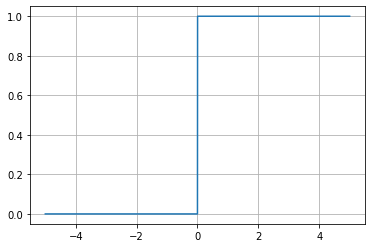

In [34]:
plt.plot(x, y)
plt.grid()
plt.show()

In [35]:
def plot_activation_fn(activation):
    """활성화 함수 activation을 파라미터로 전달받아서, 활성화 함수의 그래프를 그려주는 함수"""
    x = np.arange(-5, 5, 0.0001)  # 그래프를 그릴 x 좌표들
    y = activation(x)  # activation 함수의 리턴값(출력값)
    plt.plot(x, y)
    plt.grid()
    plt.show()

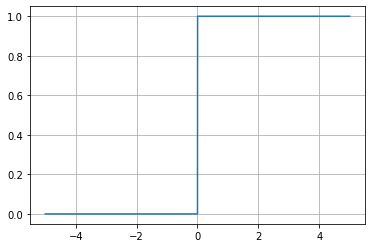

In [38]:
plot_activation_fn(activation=step)

## Sigmoid 함수

In [42]:
def sigmoid(x):
    y = 1 / (1 + np.exp(-x))
    return y

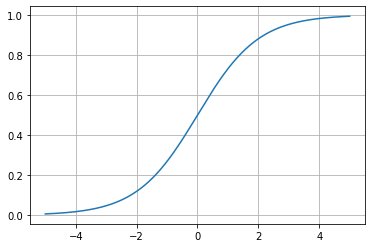

In [43]:
plot_activation_fn(sigmoid)

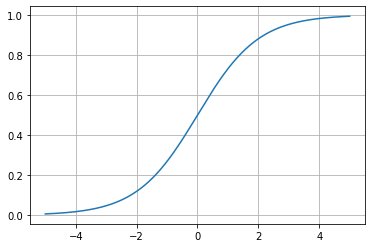

In [44]:
plot_activation_fn(expit)

## tanh(Hyperbolic tangent)

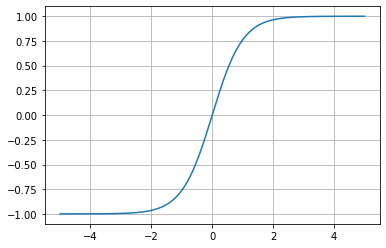

In [45]:
plot_activation_fn(np.tanh)

## ReLU(Rectified Linear Unit) 함수

In [48]:
def relu(x):
    y = np.maximum(x, 0)
    return y

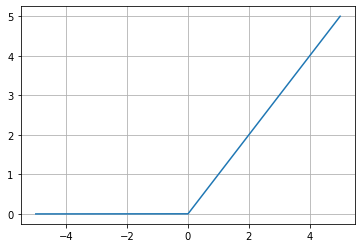

In [49]:
plot_activation_fn(relu)